In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline         

from skimage.io import imread

from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.color import rgb2gray

## convert color to B&W, thresholding   

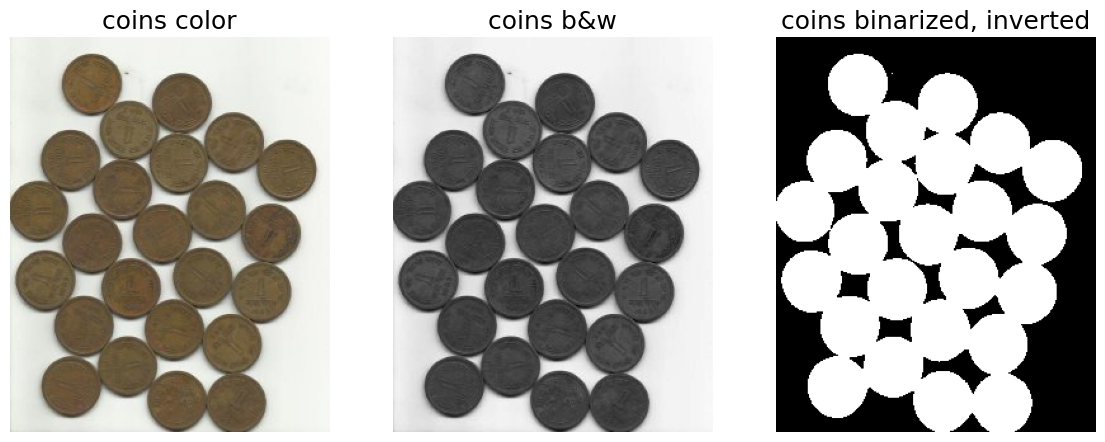

In [2]:
img_c = imread('coins.jpg')
img = rgb2gray(img_c)
img_bina_inv = (img < 0.55)

plt.figure(figsize=(14,7))
plt.subplot(131)
plt.imshow(img_c)
plt.title('coins color', fontsize=18)
plt.axis('off')

plt.subplot(132)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('coins b&w', fontsize=18)
plt.axis('off')

plt.subplot(133)
plt.imshow(img_bina_inv, cmap=plt.cm.gray)
plt.title('coins binarized, inverted', fontsize=18)
plt.axis('off')

plt.show()

## binarization gave us a semantic segmentation, we now want an instance segmentation

### 1) compute Euclidean distance transform and invert it

23.769728648009426


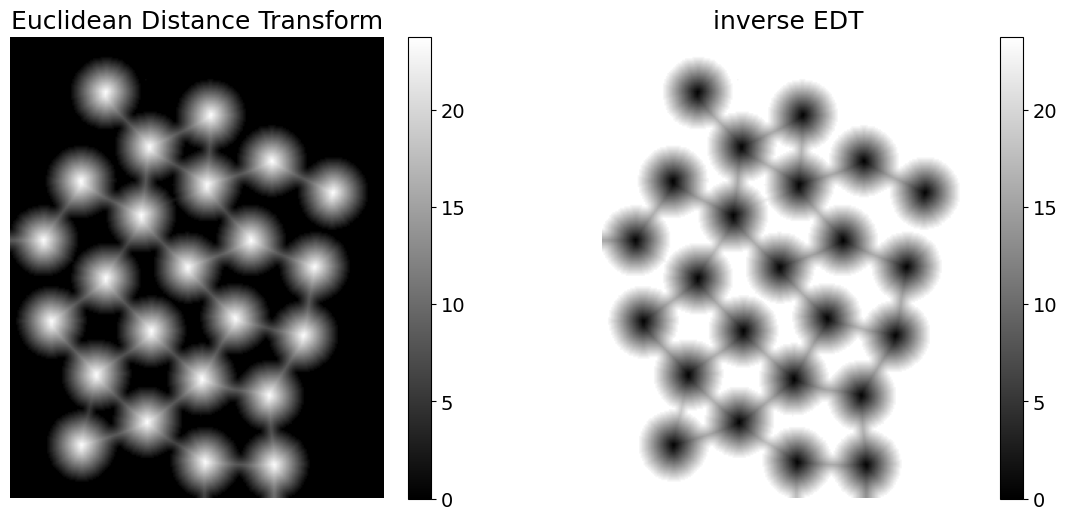

In [3]:
# Euclidean distance transform 
edt = ndi.distance_transform_edt(img_bina_inv)

print(edt.max())

# the actual watershed algorithm works on the inverse of the Euclidean distance transform (coins need to be darker)
inv_edt= edt.max()-edt


plt.figure(figsize=(14,6))

plt.subplot(121)
plt.imshow(edt, cmap=plt.cm.gray)
plt.title('Euclidean Distance Transform', fontsize=18)
plt.axis('off')
plt.colorbar()

plt.subplot(122)
plt.imshow(inv_edt, cmap=plt.cm.gray)
plt.title('inverse EDT', fontsize=18)
plt.axis('off')
plt.colorbar()

plt.show()

### 2) create labels to mark different basins

24


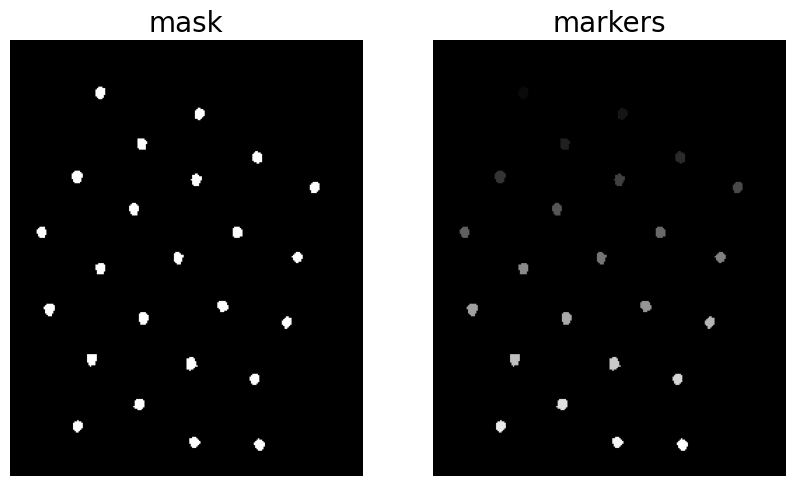

In [4]:
# find coin centers
mask = edt>20

# assign coin centers different integers
markers, _ = ndi.label(mask)

print(markers.max())

plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(mask,cmap='gray')
plt.title('mask', fontsize=20)
plt.axis('off')

plt.subplot(122)
plt.imshow(markers,cmap='gray')
plt.title('markers', fontsize=20)
plt.axis('off')

plt.show()


### 3) the actual watershed algorithm

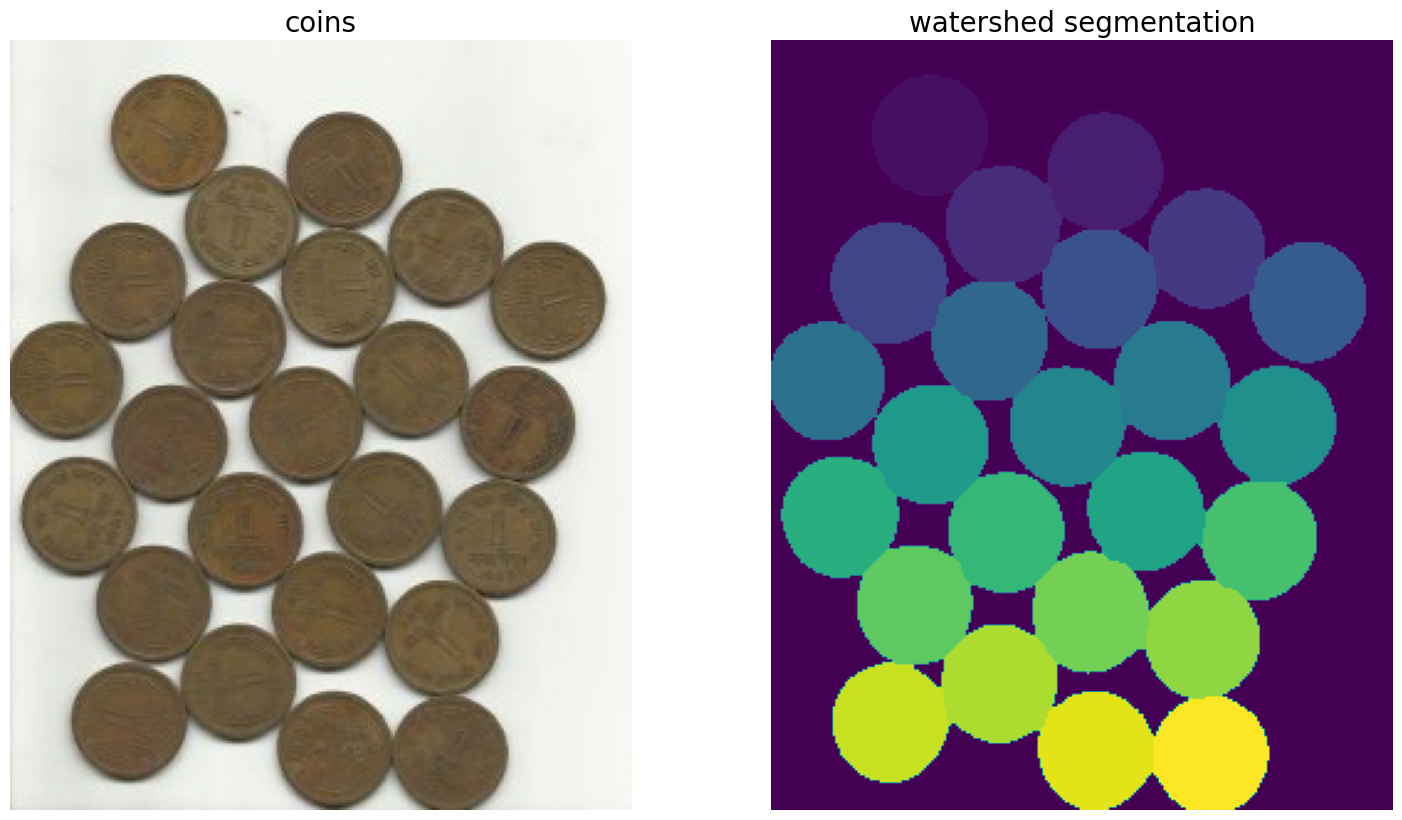

In [5]:
label_img = watershed(inv_edt, 
                      markers,             # where to start basins & provide labels
                      mask=img_bina_inv    # mask avoids assigning labels to background pixels
                     ) 

plt.figure(figsize=(18,10))

plt.subplot(121)
plt.imshow(img_c)
plt.title('coins', fontsize=20)
plt.axis('off')

plt.subplot(122)
plt.imshow(label_img)
plt.title('watershed segmentation', fontsize=20)
plt.axis('off')
plt.show()
